In [ ]:
import parselmouth
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_path = "sneeze_1.wav"
time_series, sampling_rate = librosa.load(file_path)

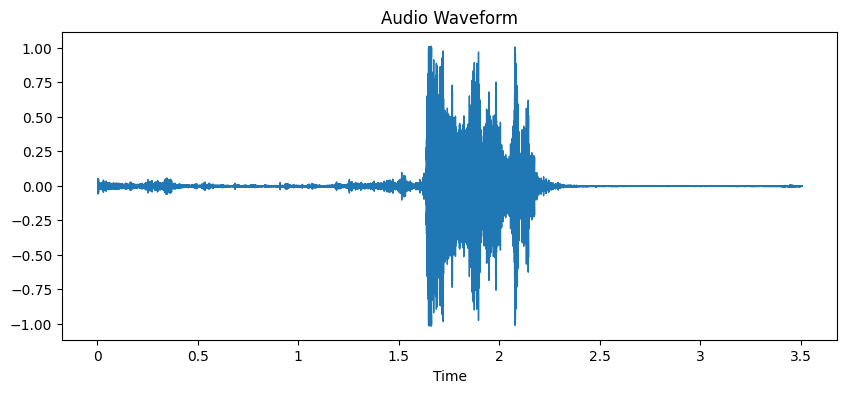

In [5]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(time_series, sr=sampling_rate)
plt.title('Audio Waveform')
plt.show()

In [7]:
sound = parselmouth.Sound(time_series, sampling_rate)
intensity = sound.to_intensity()

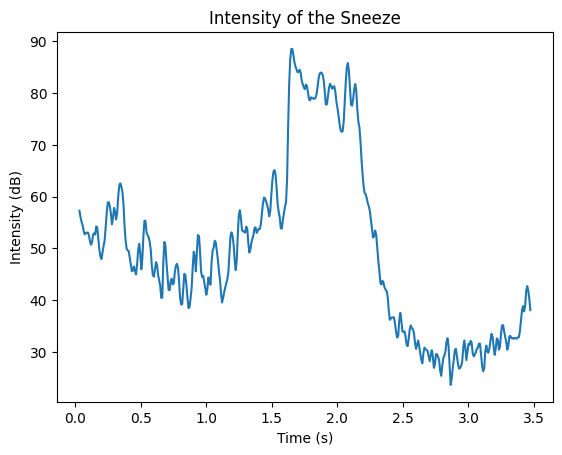

In [8]:
plt.figure()
plt.plot(intensity.xs(), intensity.values.T)
plt.title('Intensity of the Sneeze')
plt.xlabel('Time (s)')
plt.ylabel('Intensity (dB)')
plt.show()

In [9]:
pitch = sound.to_pitch()
pitch_values = pitch.selected_array['frequency']

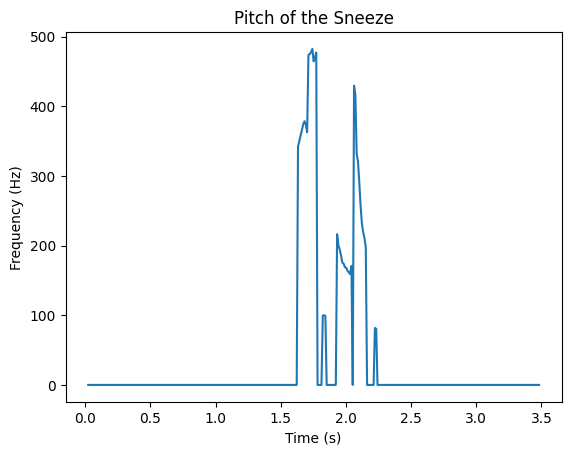

In [10]:
plt.figure()
plt.plot(pitch.xs(), pitch_values)
plt.title('Pitch of the Sneeze')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

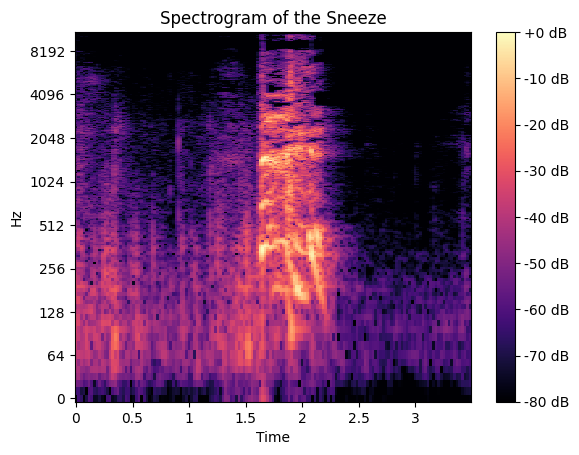

In [11]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(time_series)), ref=np.max)
librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of the Sneeze')
plt.show()

In [31]:
onset_frames = librosa.onset.onset_detect(y=time_series, sr=sampling_rate, delta=0.3)
onset_times = librosa.frames_to_time(onset_frames, sr=sampling_rate)

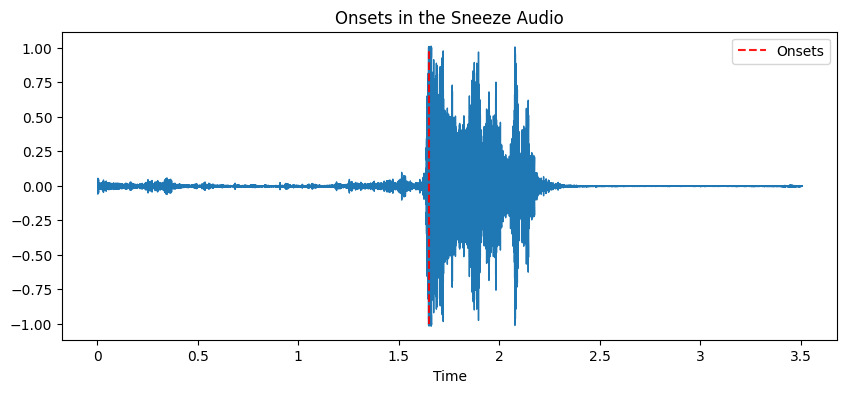

In [32]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(time_series, sr=sampling_rate)
plt.vlines(onset_times, -1, 1, color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.legend()
plt.title('Onsets in the Sneeze Audio')
plt.show()

In [36]:
sneeze_time = onset_times[0]

In [94]:
frame_length = 2048
hop_length = 512
energy = np.array([sum(abs(time_series[i:i+frame_length]**2)) for i in range(0, len(time_series), hop_length)])
low_energy_frames = np.where(np.percentile(energy, 50) > energy)
low_energy_times = librosa.frames_to_time(low_energy_frames, sr=sampling_rate, hop_length=hop_length)

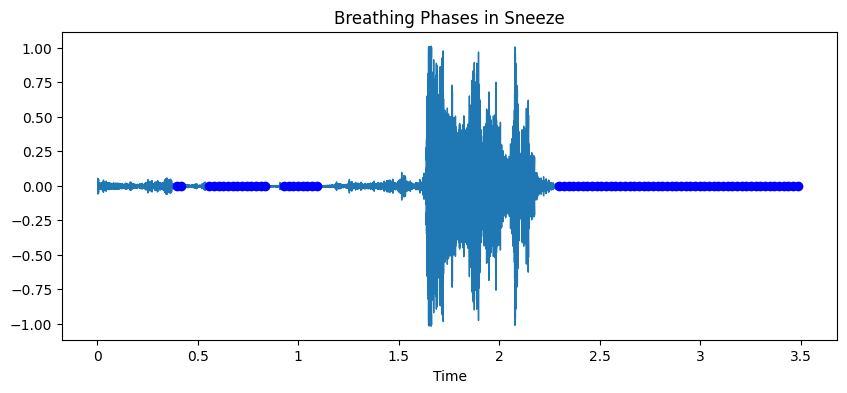

In [95]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(time_series, sr=sampling_rate)
plt.scatter(low_energy_times, np.zeros_like(low_energy_times), color='b')
plt.title('Breathing Phases in Sneeze')
plt.show()